# Introduction

Principal Component Analysis (PCA) is a popular technique in modern data analysis. It can be used to extract useful informations from data sets. PCA reduces a confusing data set to lower dimension and construct a simplified structure within the data.

A mathmetical definition of PCA would be orthogonal transformation to a set of possibly correlated variables into a set of linearly uncorrelated variables. A good PCA would decrease variation in the dataset.

PCA is commonly used in building stock porfolio. The goal when building a stock portfolio is to have a diverse stock so that when an invester invests into couple different stocks, he/she is spreading the chances and the danger of investment. If he/she invested in couple stocks with the same danger and no variance, he/she is not increasing the chance of making money, but rather taking a bigger chance by investing in different stocks than investing in one stock. Because of this, PCA makes a perfect tool for increasing the variance of a stock portfolio.

# Turotial Content

This tutorial will introduce you to some basic method for analyzing financial data set using PCA. I will go through procedures to prepare data to be used in a PCA framework. In specific, I will be demonstrating the use of Scikit-learn's decompositin module. 

I will be using datasets from Yahoo! finance: https://finance.yahoo.com/. Yahoo! finance rid of their historical data. However, fix-yahoo-finance can be used to scrape historical data from Yahoo! finance.

Topics that are covered in this tutorial are:
- Installing the libraries
- Loading and cleaning data
- Looking into stock data
- Correlation v.s. Covariance
- Eigenvalues
- Explained variance
- Scikit-learn PCA
- Visualization
- Summary and references

## 1. Installing the libraries

Libraries that are used in this tutorial are: pandas, scikit-learn, pandas datareader, matplotlib, and fix_yahoo_finance.
You can install pandas as part of Anaconda distribution or using `pip`:

    $ conda install pandas
    
    $ pip install pandas
   
If you already have numpy and scipy, you can install scikit-learn by the code: 

    $ conda install scikit-learn
    
    $ pip install -U scikit-learn
    
You can install pandas datareader and fix_yahoo_finance using `pip`:
    
    $ pip install pandas-datareader

    $ pip install fix_yahoo_finance --upgrade --no-cache-dir

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from mpl_toolkits.mplot3d import Axes3D
# This code comes from homwework. 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

## 2. Loading and cleaning data

We are going to load some example financial dataset. This returns a pandas dataframe with columns Open, High, Low, Close, Adj Close and Volume. The argument specifing the start and end date can be written in the form of "2018-01-01". We specifically look at dates 2009-01-01 to 2017-12-31, period after the financial crisis. Drop all NA values.



In [2]:
def retrieve_data(name, start, end):
    df = pdr.get_data_yahoo(name, start=start, end=end)
    df.dropna(inplace=True)
    return df

I will load 10 stocks from technical sector: 
Apple, Cisco, IBM, Intel, 3M, Microsoft, Verizon, Adobe, Qualcom, VM Ware respectively.

In [3]:
aapl = retrieve_data("AAPL", "2009-01-01", "2017-12-31")
csco = retrieve_data("CSCO", "2009-01-01", "2017-12-31")
ibm = retrieve_data("IBM", "2009-01-01", "2017-12-31")
intx = retrieve_data("INTX", "2009-01-01", "2017-12-31")
mmm = retrieve_data("MMM", "2009-01-01", "2017-12-31")
msft = retrieve_data("MSFT", "2009-01-01", "2017-12-31")
vz = retrieve_data("VZ", "2009-01-01", "2017-12-31")
adbe = retrieve_data("ADBE", "2009-01-01", "2017-12-31")
qcom = retrieve_data("QCOM", "2009-01-01", "2017-12-31")
vmw = retrieve_data("VMW", "2009-01-01", "2017-12-31")
print(aapl.head())

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2009-01-02  12.268572  13.005714  12.165714  12.964286   8.776257  186503800
2009-01-05  13.310000  13.740000  13.244286  13.511429   9.146649  29

## 3. Looking into stock data

Historical Yahoo! finance data will give back 6 columns. 

Open:Price at the beginning of the trading day <br>
High: Highest price of the day <br>
Low: Lowest price of the day <br>
Close: Price at the end of the trading day <br>
Adj Close: Closing price of the stock adjusted for splits and divends <br>
Volume: Number of shares <br>

We will use adjusted close only as a representation of stock value. We will build a new matrix using just adj close.

In [4]:
table = pd.DataFrame()
table['AAPL'] = aapl['Adj Close']
table['CSCO'] = csco['Adj Close']
table['IBM'] = ibm['Adj Close']
table['INTX'] = intx['Adj Close']
table['MMM'] = mmm['Adj Close']
table['MSFT'] = msft['Adj Close']
table['VZ'] = vz['Adj Close']
table['ADBE'] = adbe['Adj Close']
table['QCOM'] = qcom['Adj Close']
table['VMW'] = vmw['Adj Close']
print(table.head())

                AAPL       CSCO        IBM      INTX        MMM       MSFT  \
Date                                                                         
2009-01-02  8.776257  13.908728  69.226089  4.087232  46.628033  16.065437   
2009-01-05  9.146649  14.031741  68.790306  3.867325  46.084457  16.215574   
2009-01-06  8.995786  14.589402  70.699829  3.905240  46.628033  16.405235   
2009-01-07  8.801402  14.203962  69.558861  3.981070  45.745731  15.417444   
2009-01-08  8.964839  14.384381  69.075569  3.943155  46.147484  15.899485   

                   VZ       ADBE       QCOM    VMW  
Date                                                
2009-01-02  20.371870  23.020000  29.745440  23.74  
2009-01-05  19.101566  23.129999  29.263739  23.74  
2009-01-06  18.795757  24.219999  29.825729  24.58  
2009-01-07  19.052860  24.230000  28.541164  24.83  
2009-01-08  19.345524  24.290001  28.324404  26.33  


We will use log return. There are many reasons to use log return instead of just adjusted close. One is that it normalizes the data. It allows us to look at relationship between variables. We drop the first column since it will always have NA values.

In [5]:
table['AAPL'] = np.log(table['AAPL']) - np.log(table['AAPL'].shift(1))
table['CSCO'] = np.log(table['CSCO']) - np.log(table['CSCO'].shift(1))
table['IBM'] = np.log(table['IBM']) - np.log(table['IBM'].shift(1))
table['INTX'] = np.log(table['INTX']) - np.log(table['INTX'].shift(1))
table['MMM'] = np.log(table['MMM']) - np.log(table['MMM'].shift(1))
table['MSFT'] = np.log(table['MSFT']) - np.log(table['MSFT'].shift(1))
table['VZ'] = np.log(table['VZ']) - np.log(table['VZ'].shift(1))
table['ADBE'] = np.log(table['ADBE']) - np.log(table['ADBE'].shift(1))
table['QCOM'] = np.log(table['QCOM']) - np.log(table['QCOM'].shift(1))
table['VMW'] = np.log(table['VMW']) - np.log(table['VMW'].shift(1))
table.dropna(inplace=True)
print(table.head())

                AAPL      CSCO       IBM      INTX       MMM      MSFT  \
Date                                                                     
2009-01-05  0.041338  0.008805 -0.006315 -0.055305 -0.011726  0.009302   
2009-01-06 -0.016631  0.038973  0.027380  0.009756  0.011726  0.011628   
2009-01-07 -0.021845 -0.026774 -0.016270  0.019231 -0.019103 -0.062101   
2009-01-08  0.018399  0.012622 -0.006972 -0.009569  0.008744  0.030787   
2009-01-09 -0.023135 -0.049075 -0.028860 -0.039221 -0.014443 -0.030275   

                  VZ      ADBE      QCOM       VMW  
Date                                                
2009-01-05 -0.064385  0.004767 -0.016327  0.000000  
2009-01-06 -0.016139  0.046048  0.019022  0.034772  
2009-01-07  0.013586  0.000413 -0.044024  0.010119  
2009-01-08  0.015244  0.002473 -0.007624  0.058656  
2009-01-09 -0.007127 -0.011594 -0.007968 -0.050634  


## 4. Correlation versus Covariance

The concept of covariance and correlation are very similar. They are both used to describe the degree of random variables' deviation from expected values. Correlation however is scaled between -1 and 1 while covariance ranges from 0. The two are easily converted from one to another. In general, you use covariance when variable scales are same and you use correlation otherwise. 

I will be using covariance matrix.

In [6]:
cov_mat = table.cov()
print(cov_mat)

          AAPL      CSCO       IBM      INTX       MMM      MSFT        VZ  \
AAPL  0.000279  0.000114  0.000083  0.000066  0.000090  0.000103  0.000052   
CSCO  0.000114  0.000277  0.000101  0.000055  0.000110  0.000130  0.000065   
IBM   0.000083  0.000101  0.000157  0.000044  0.000079  0.000090  0.000056   
INTX  0.000066  0.000055  0.000044  0.001387  0.000056  0.000070  0.000030   
MMM   0.000090  0.000110  0.000079  0.000056  0.000156  0.000097  0.000065   
MSFT  0.000103  0.000130  0.000090  0.000070  0.000097  0.000235  0.000064   
VZ    0.000052  0.000065  0.000056  0.000030  0.000065  0.000064  0.000123   
ADBE  0.000115  0.000145  0.000100  0.000101  0.000118  0.000148  0.000070   
QCOM  0.000117  0.000125  0.000088  0.000067  0.000102  0.000112  0.000065   
VMW   0.000139  0.000165  0.000120  0.000112  0.000120  0.000144  0.000065   

          ADBE      QCOM       VMW  
AAPL  0.000115  0.000117  0.000139  
CSCO  0.000145  0.000125  0.000165  
IBM   0.000100  0.000088  0.00

## 5. Eigenvalues

I will do a eigenvalue decomposition with numpy resulting in two values: eigen value and eigen vector. The reason for doing this can be seen later when we look at how the explained variance plot. This shows how much of the data is explained by what percent of the components and allows us to choose the number of components for PCA.

In [7]:
eig_val, eig_vec = np.linalg.eig(cov_mat.T)
print(eig_val)
print(eig_vec)

[1.53004470e-03 1.07473312e-03 3.27892021e-04 2.04466902e-04
 1.71135374e-04 1.63031653e-04 6.69455746e-05 8.11064699e-05
 1.22550135e-04 1.07973403e-04]
[[-1.68966017e-01 -2.45568642e-01  2.18919878e-01 -5.35077626e-01
   5.80199742e-01  4.78692202e-01  5.66477270e-02 -3.24266848e-02
  -7.10562304e-02  4.27216777e-02]
 [-1.81961667e-01 -2.95458860e-01  2.05474081e-01 -3.69262398e-02
   1.34479369e-01 -6.35899110e-01  1.11130868e-01 -5.09710498e-02
  -6.09022702e-01  1.66438338e-01]
 [-1.28627945e-01 -1.98037683e-01  1.08753213e-01 -4.13476783e-02
   5.60989776e-02 -1.90754072e-01  3.57707000e-02  8.07199844e-01
   2.02890546e-01 -4.44014775e-01]
 [-8.28123582e-01  5.60128907e-01  8.71124944e-05 -1.13145547e-02
  -2.07359758e-03 -1.63251837e-02  3.65182607e-03  1.79152314e-03
  -6.96847432e-03 -1.73150955e-03]
 [-1.42979176e-01 -2.08375078e-01  1.60802552e-01 -5.52180461e-04
   1.11752364e-02 -1.22115001e-01 -8.13825151e-01 -3.10685936e-01
   1.09140862e-01 -3.52835943e-01]
 [-1.760020

We look at singular value decomposition. PCA is mathematical similar to SVD and eigenvalue decomposition on covariance matrix should yield a similar result.

In [8]:
svd, a, b = np.linalg.svd(cov_mat)
print(eig_vec[0])
print(svd[0])

[-0.16896602 -0.24556864  0.21891988 -0.53507763  0.58019974  0.4786922
  0.05664773 -0.03242668 -0.07105623  0.04272168]
[-0.16896602  0.24556864  0.21891988 -0.53507763  0.58019974 -0.4786922
  0.07105623 -0.04272168 -0.03242668 -0.05664773]


We will sort the eigenvalues with its eigenvector. We first create a list of tuples of eigenvalue and eigenvector. Then we sort in decreasing order. 

In [9]:
eig_pair = []
for i in range(len(eig_val)):
    eig_pair.append((np.abs(eig_val[i]), eig_vec[:,i]))
eig_pair.sort(key=lambda x: x[0], reverse=True)

for pair in eig_pair:
    print(pair[0])

0.0015300447007945608
0.0010747331163004198
0.0003278920210710395
0.00020446690233994147
0.00017113537410116795
0.00016303165341982495
0.00012255013461416982
0.00010797340344094334
8.110646988605728e-05
6.694557456189247e-05


## 6. Explained variance

We will calculate the explained variance using the eigenvalues. 
We create a list of cumulative sum in order to visualize the variance. This allows us to see how many components should be able to sufficiently decrible the data. We use cumulative sum to show the percentage. 

In [10]:
tot = sum(eig_val)
var = [100 * (i / tot) for i in sorted(eig_val, reverse=True)]
cum_var = np.cumsum(var)
print(var)
print(cum_var)

[39.74266623664239, 27.916020696920285, 8.516942771879284, 5.310995065645168, 4.445213953980338, 4.234721106192072, 3.183220133828303, 2.8045918744461047, 2.1067275751093666, 1.738900585356681]
[ 39.74266624  67.65868693  76.17562971  81.48662477  85.93183873
  90.16655983  93.34977997  96.15437184  98.26109941 100.        ]


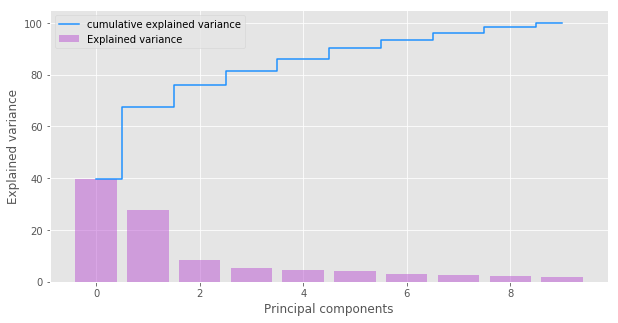

In [11]:
plt.bar(range(10), var, alpha=0.5, align='center', color='mediumorchid', \
            label='Explained variance')
plt.step(range(10), cum_var, label='cumulative explained variance', \
             where='mid', color='dodgerblue')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.legend(loc='best')
plt.show()

We can see that most of the variance comes from the first 63 percent. A bit less than 80 percent and a bit more tham 70 percent comes from the first 3 components. I will use 3 of the principal components and drop the rest to show how it would be like to visualize. Here, we can start using scikit-learn's PCA module. The codes below allow dimensionality reduction on the data.

## 7. Scikit-learn PCA

After going through the process above to calculate the number of components that we would like to keep in PCA, we use Scikit-learn's decomposition module to reduce the dimensionality of our data. There are numerous ways to do this including matrix calculation, but Scikit-learn makes this process incredibly simple. 

In [12]:
pca = PCA(n_components=3)
re = pca.fit_transform(table)
print(re)

[[ 4.63227928e-02  2.92484261e-02 -3.28744486e-03]
 [-4.19897450e-02  4.43392408e-02 -7.26456337e-03]
 [ 1.30136687e-02 -5.44189602e-02 -4.69469881e-02]
 ...
 [ 2.42442356e-03  4.28283350e-03  7.59820582e-03]
 [-3.38728256e-02 -2.45316578e-02  2.95681750e-03]
 [-8.03519635e-03 -2.86997458e-02 -3.79376847e-05]]


## 8. Visualization

I will use a 3d plot visualizer to show the space when the date is reduced into 3 components. When there are more than 3, you can still see the correlation in the data when visualized on a 2d graph.

Text(0.5,0,'PC 3')

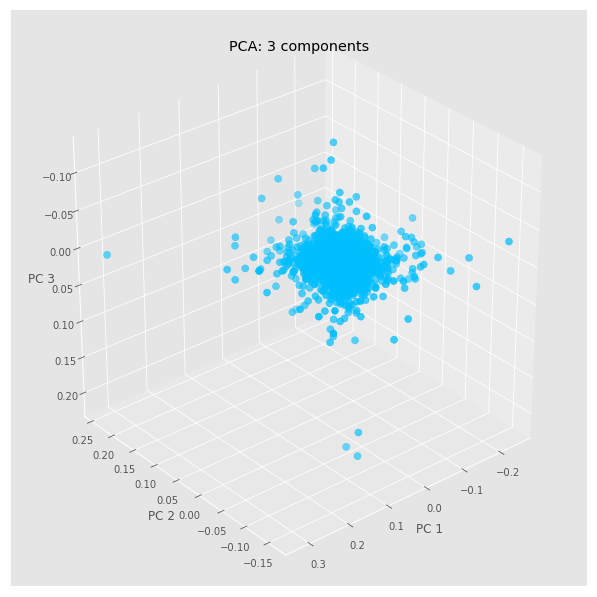

In [13]:
fig = plt.figure(1, figsize=(8, 8))
gr = Axes3D(fig, elev=-150, azim=130)

gr.scatter(re[:, 0], re[:, 1], re[:, 2], color='deepskyblue', s=50)
gr.set_title("PCA: 3 components")
gr.set_xlabel("PC 1")
gr.set_ylabel("PC 2")
gr.set_zlabel("PC 3")

You can see PCs with different number of components below. 

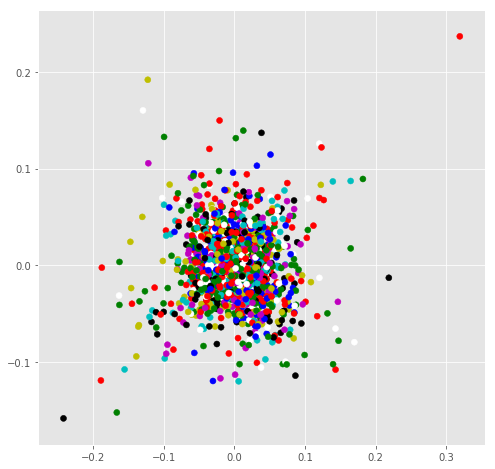

In [14]:
pca2 = PCA(n_components=2)
re2 = pca2.fit_transform(table)
fig = plt.figure(1, figsize=(8, 8))
color_list = [["r","g","b","w","y","k","m","c", "r","g"][x] for x in range(10)]
plt.scatter(re2[:, 0], re2[:, 1], color = color_list)

As a comparison, I will do a PCA on correlation matrix rather than covariance. Because we will use 3 components, I will skip some steps that I did earlier.

Text(0.5,0,'PC 3')

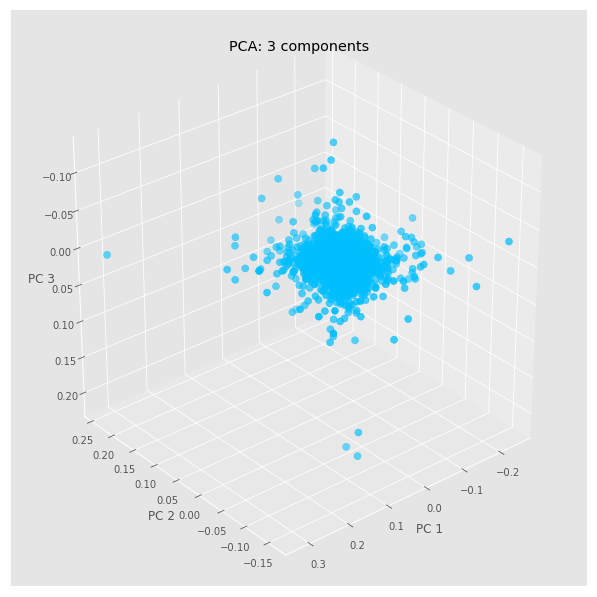

In [15]:
corr_mat = table.corr()

eig_val_corr, eig_vec_corr = np.linalg.eig(corr_mat.T)

pca_corr = PCA(n_components=3)
re_corr = pca_corr.fit_transform(table)

fig = plt.figure(1, figsize=(8, 8))
gr = Axes3D(fig, elev=-150, azim=130)

gr.scatter(re_corr[:, 0], re_corr[:, 1], re_corr[:, 2], \
               color='deepskyblue', s=50)
gr.set_title("PCA: 3 components")
gr.set_xlabel("PC 1")
gr.set_ylabel("PC 2")
gr.set_zlabel("PC 3")

Correlation matrix and covariance matrix barely have any difference especially when used with data from Yahoo! finance.

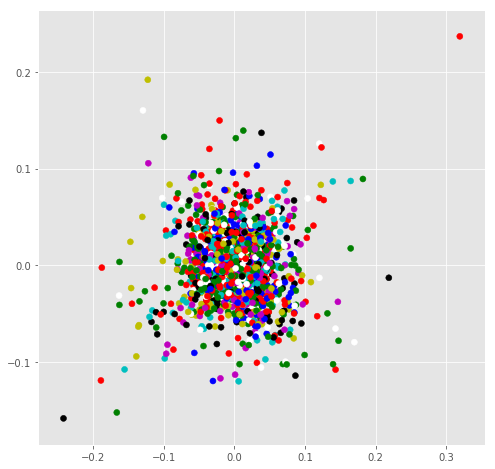

In [16]:
pca2_corr = PCA(n_components=2)
re2_corr = pca2.fit_transform(table)
fig = plt.figure(1, figsize=(8, 8))
color_list = [["r","g","b","w","y","k","m","c", "r","g"][x] for x in range(10)]
plt.scatter(re2_corr[:, 0], re2_corr[:, 1], color=color_list)

## 9. Summary and references

This tutorial showed a very simple step of preparing the dataset into use of Scikit-learn's decomposition module and visualizing the transfored data. There are many more details to put in when considering variable such as missing values, different time for stock market and etc. More details on the library and Principal Component Analysis are available in the following links.

1. Scikit-learn, Decomposition: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition
2. Yahoo! finance: https://finance.yahoo.com/
3. Mathematical understanding of PCA: https://arxiv.org/pdf/1404.1100.pdf
4. PCA for stock portfolio management: https://ijpam.eu/contents/2017-115-1/12/12.pdf